In [18]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Loading the dataset and display the first few rows
df = pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [ ]:
#Check for the columns in the dataframe
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [ ]:
#Show the number of rows and columns in the dataset
print(f'The dataframe contains {df.shape[0]} rows')
print(f'The dataframe contains {df.shape[1]} columns')

The dataframe contains 50000 rows
The dataframe contains 15 columns


In [ ]:
# Get the basic information and concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [7]:
#checking the summary statistics of the dataset
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [14]:
# Check for the duplicates in the dataframe 
df.duplicated().sum()

0

There are no duplicates in the dataframe so the dataframe will remain unchanged 

In [ ]:
#Check for the data types of the columns in the dataframe
df.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

In [17]:
# Checking for missing values in the dataset
df.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

There aren't any missing values in the dataframe so the dataframe will remain unchanged 

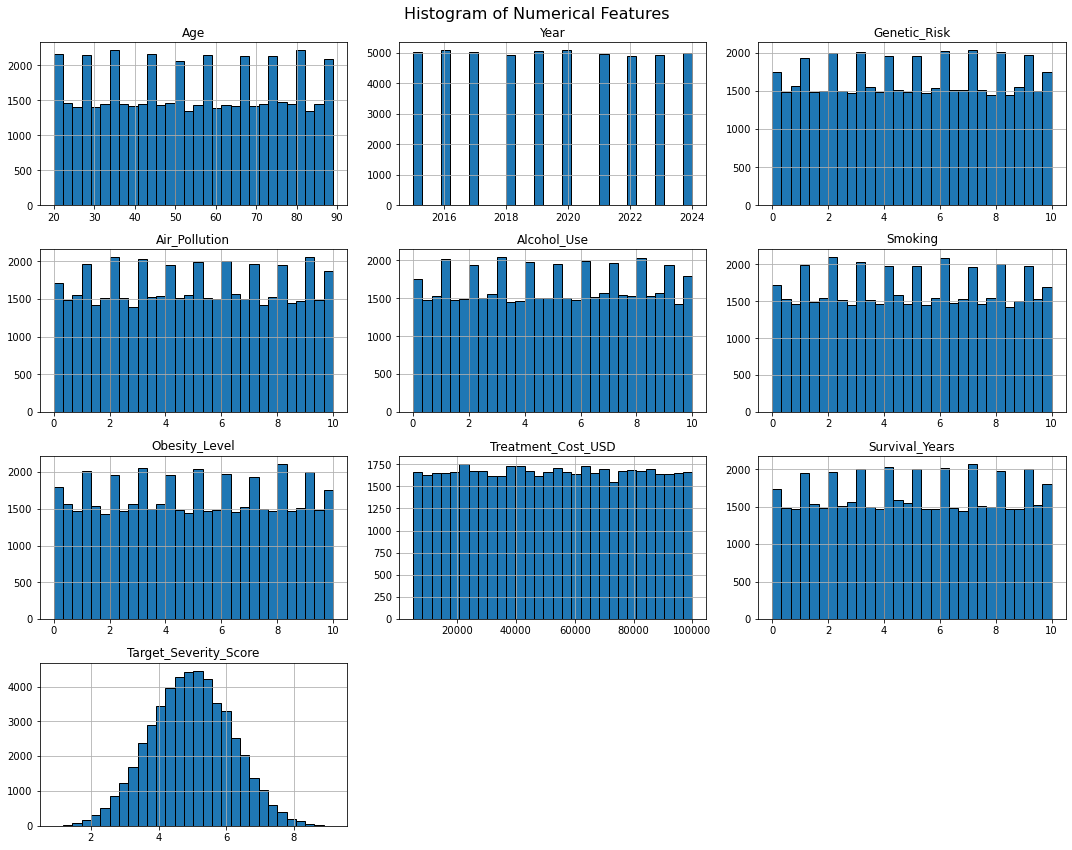

In [19]:
#Checking and handling outliers

# Plot histograms for all numeric columns in df
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()



In [20]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier indices per feature
outlier_indices = {}

# Loop through each numeric column to compute IQR and find outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_indices[col] = outliers.index.tolist()
    
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print("-" * 40)


Column: Age
Number of outliers: 0
----------------------------------------
Column: Year
Number of outliers: 0
----------------------------------------
Column: Genetic_Risk
Number of outliers: 0
----------------------------------------
Column: Air_Pollution
Number of outliers: 0
----------------------------------------
Column: Alcohol_Use
Number of outliers: 0
----------------------------------------
Column: Smoking
Number of outliers: 0
----------------------------------------
Column: Obesity_Level
Number of outliers: 0
----------------------------------------
Column: Treatment_Cost_USD
Number of outliers: 0
----------------------------------------
Column: Survival_Years
Number of outliers: 0
----------------------------------------
Column: Target_Severity_Score
Number of outliers: 151
----------------------------------------


There are **151 outliers** detected in the `Target_Severity_Score` column based on the IQR method, and they will be **dropped** to improve model reliability.


In [ ]:
# Handling Outliers in Target_Severity_Score
#During exploratory data analysis, outliers were identified in the Target_Severity_Score column using the Interquartile Range (IQR) method. A total of 151 outliers were detected. Given that the dataset contains a sufficient number of records, these outliers were removed to reduce their potential impact on model performance and to ensure more stable and reliable predictions. This step was taken to improve model generalization and reduce the risk of overfitting due to extreme values.

In [21]:
df = df[(df['Target_Severity_Score'] >= lower_bound) & (df['Target_Severity_Score'] <= upper_bound)]


In [ ]:
#Checking agin to see the basic information of the dataset after dropping the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49849 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             49849 non-null  object 
 1   Age                    49849 non-null  int64  
 2   Gender                 49849 non-null  object 
 3   Country_Region         49849 non-null  object 
 4   Year                   49849 non-null  int64  
 5   Genetic_Risk           49849 non-null  float64
 6   Air_Pollution          49849 non-null  float64
 7   Alcohol_Use            49849 non-null  float64
 8   Smoking                49849 non-null  float64
 9   Obesity_Level          49849 non-null  float64
 10  Cancer_Type            49849 non-null  object 
 11  Cancer_Stage           49849 non-null  object 
 12  Treatment_Cost_USD     49849 non-null  float64
 13  Survival_Years         49849 non-null  float64
 14  Target_Severity_Score  49849 non-null  float64
dtypes: